# Lecture 4

## PCA

In [17]:
import pandas as pd

data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data_array = data.to_numpy()
np.random.shuffle(data_array)

data_features = data_array[:, :-1]
data_labels = data_array[:, -1]
standard_scaler = StandardScaler()
normalized_data_features = standard_scaler.fit_transform(data_features)

pca = PCA(n_components=3).fit(normalized_data_features)

data_features_pca = pca.transform(normalized_data_features)

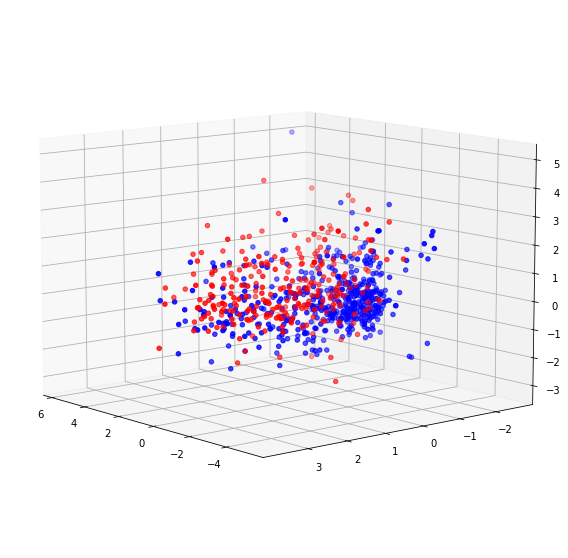

In [49]:
from matplotlib import pyplot as plt

data_features_pca_x = data_features_pca[:, 0]
data_features_pca_y = data_features_pca[:, 1]
data_features_pca_z = data_features_pca[:, 2]

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(data_features_pca_x[data_labels == 1], 
             data_features_pca_y[data_labels == 1], 
             data_features_pca_z[data_labels == 1], 
             color='red')

ax.scatter3D(data_features_pca_x[data_labels == 0], 
             data_features_pca_y[data_labels == 0], 
             data_features_pca_z[data_labels == 0], 
             color='blue')
ax.view_init(10, 140)

## KNN

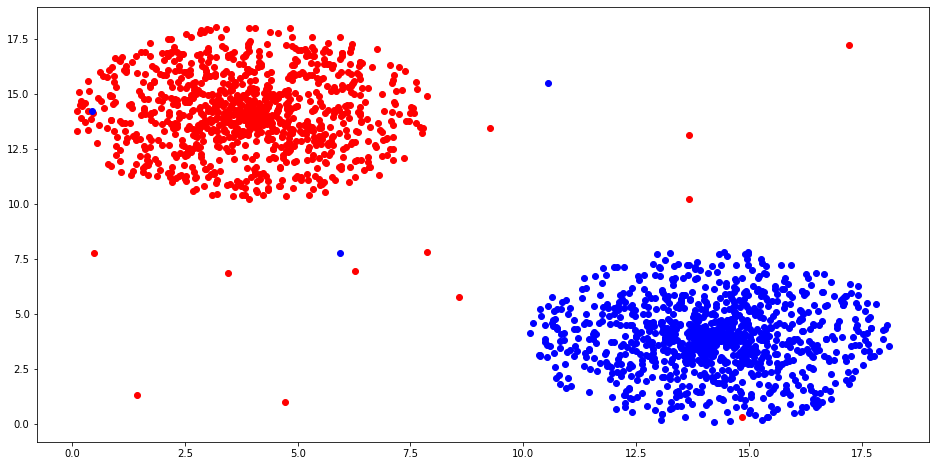

In [52]:
data = pd.read_csv('knn_data.csv')

array = data.to_numpy()
np.random.shuffle(array)

class1 = []
class2 = []

for p in array:
    if p[2] == 0:
        class1.append(p)
    else:
        class2.append(p)

plt.figure(figsize=(16, 8))
plt.scatter([p[0] for p in class1], [p[1] for p in class1], color='red')
plt.scatter([p[0] for p in class2], [p[1] for p in class2], color='blue')
plt.show()

In [54]:
from sklearn.cluster import KMeans

data_features = array[:, :-1]
kmeans = KMeans(n_clusters=2).fit(data_features)

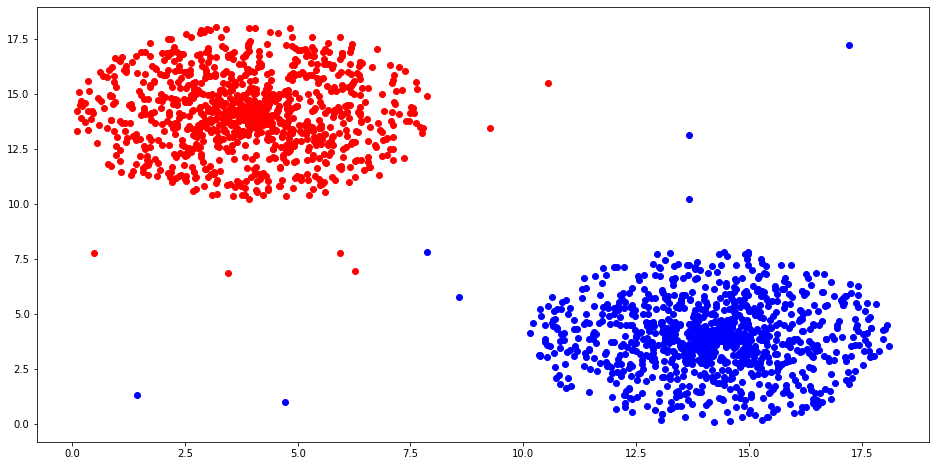

In [57]:
predicted_labels = kmeans.predict(data_features)

plt.figure(figsize=(16, 8))
plt.scatter(data_features[predicted_labels == 1][:, 0], data_features[predicted_labels == 1][:, 1], color='red')
plt.scatter(data_features[predicted_labels == 0][:, 0], data_features[predicted_labels == 0][:, 1], color='blue')
plt.show()

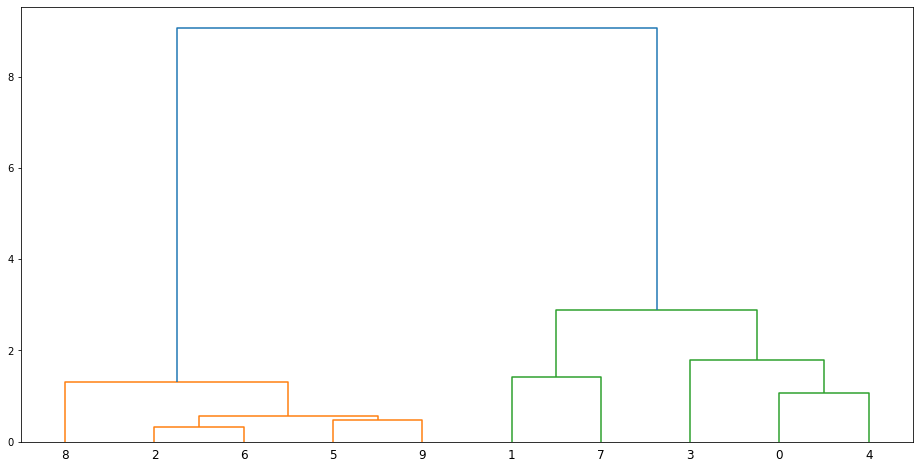

In [125]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.utils import shuffle

iris = load_iris()
data_x = iris.data
data_y = iris.target

data_x, data_y = shuffle(iris.data, iris.target)

sample_x = data_x[:10]
sample_y = data_y[:10]

# linkage types: ward, single, average, complete
# ward => minimize variance between clusters
# single => minimum of all distances between clusters
# average => average of all distances between clusters
# complete => maximum of all distances between clusters
# n_clusters (doesn't build the full tree if not None and stops merging clusters when n_clusters is reached)
# distance_threshold (merges the clusters only if the distance according to the linkage is below this threshold)
# Note: if compute_full_tree is True, and n_clusters is False, it will calculate the entire tree (used for visualization)

model = AgglomerativeClustering(distance_threshold=0.0, 
                                compute_full_tree=True, 
                                n_clusters=None, 
                                linkage='ward')
model = model.fit(sample_x)

linkage_matrix = np.column_stack(
    [model.children_, model.distances_, np.zeros(sample_x.shape[0] - 1)]
).astype(float)

plt.figure(figsize=(16, 8))
dendrogram(linkage_matrix)

plt.show()

In [134]:
from sklearn.metrics import accuracy_score

model = AgglomerativeClustering(n_clusters=3, 
                                linkage='ward')
model = model.fit(data_x)

accuracy_score(data_y, model.labels_)

0.23333333333333334

## t-SNE

/home/u764/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


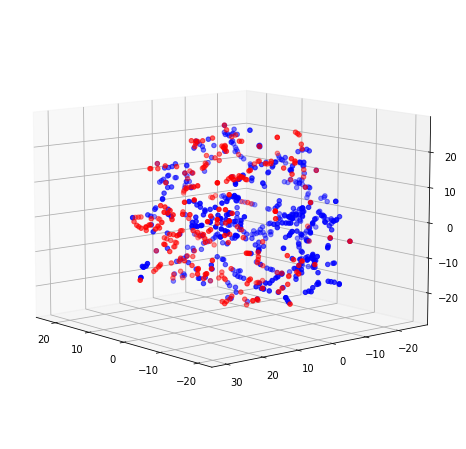

In [150]:
from sklearn.manifold import TSNE

data = pd.read_csv('diabetes.csv')

data_array = data.to_numpy()
np.random.shuffle(data_array)

data_features = data_array[:, :-1]
data_labels = data_array[:, -1]
standard_scaler = StandardScaler()
normalized_data_features = standard_scaler.fit_transform(data_features)

embedded_features = TSNE(n_components=3, 
                         learning_rate='auto',
                         perplexity=3).fit_transform(normalized_data_features)

embedded_features_x = embedded_features[:, 0]
embedded_features_y = embedded_features[:, 1]
embedded_features_z = embedded_features[:, 2]

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(projection='3d')
ax.scatter3D(embedded_features_x[data_labels == 1], 
             embedded_features_y[data_labels == 1], 
             embedded_features_z[data_labels == 1], 
             color='red')
ax.scatter3D(embedded_features_x[data_labels == 0], 
             embedded_features_y[data_labels == 0], 
             embedded_features_z[data_labels == 0], 
             color='blue')
ax.view_init(10, 140)

plt.show()